         Date  Temperature   Rainfall   Humidity
0  2024-01-01    26.645538  33.236744  83.786199
1  2024-01-02    26.179277  42.386321  47.606538
2  2024-01-03    20.306999  12.751054  71.562863
3  2024-01-04     9.232039   6.346388  70.787966
4  2024-01-05    14.565188  45.768719  53.309877
Mean Squared Error: 3.891713799090325e-29


<ipython-input-14-a14039567f5b>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


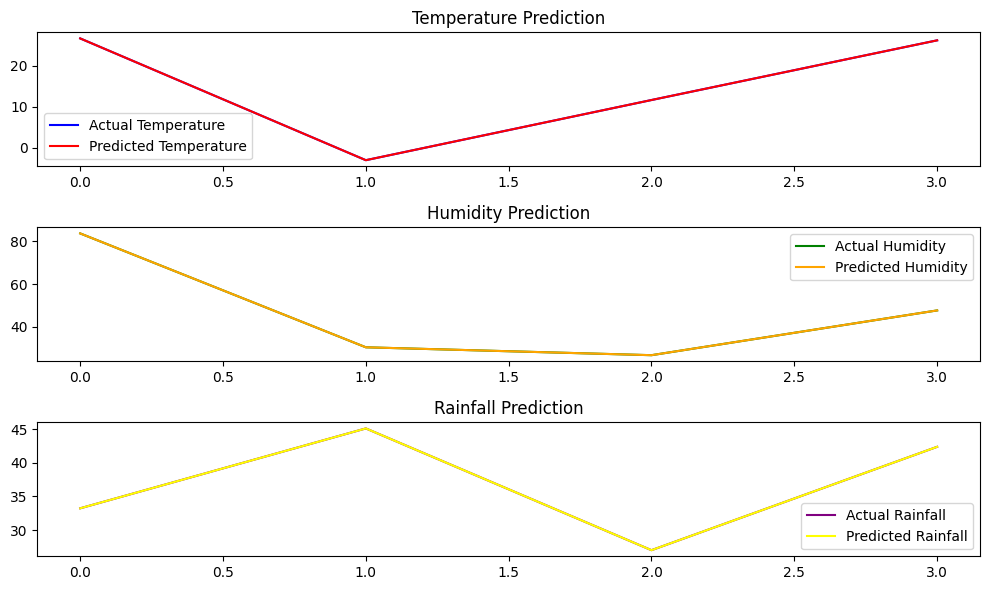

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the CSV Data
data = pd.read_csv('weather_data.csv')  # Replace with your actual CSV file path
print(data.head())  # Check the first few rows of the data

# Step 2: Preprocess the Data (Handle missing values, etc.)
# Assuming your CSV has columns: Date, Temperature, Humidity, Rainfall
# You can also convert the 'Date' column to datetime and extract useful features like year, month, etc.

# Fill missing values if any
data.fillna(method='ffill', inplace=True)

# Step 3: Feature Selection and Data Splitting
# Here, we'll predict Temperature, Humidity, and Rainfall
features = ['Temperature', 'Humidity', 'Rainfall']  # Features in your dataset
target = ['Temperature', 'Humidity', 'Rainfall']  # We will predict these as output

# Step 4: Prepare Training and Test Data
X = data[features]  # Features
y = data[target]  # Target columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train a Simple AI Model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 9: Visualize the Results (Temperature, Humidity, Rainfall)
# Example: Plotting the predicted vs actual values for Temperature
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y_test['Temperature'].values, label='Actual Temperature', color='blue')
plt.plot(y_pred[:, 0], label='Predicted Temperature', color='red')
plt.title('Temperature Prediction')
plt.legend()

# For Humidity
plt.subplot(3, 1, 2)
plt.plot(y_test['Humidity'].values, label='Actual Humidity', color='green')
plt.plot(y_pred[:, 1], label='Predicted Humidity', color='orange')
plt.title('Humidity Prediction')
plt.legend()

# For Rainfall
plt.subplot(3, 1, 3)
plt.plot(y_test['Rainfall'].values, label='Actual Rainfall', color='purple')
plt.plot(y_pred[:, 2], label='Predicted Rainfall', color='yellow')
plt.title('Rainfall Prediction')
plt.legend()

plt.tight_layout()
plt.show()
